In [2]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from python_speech_features import mfcc

In [3]:
frequency, wave = wavfile.read("agua.wav")
transcription = "agua"

In [4]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [5]:
delta_with_convolve = lambda arr: signal.convolve(arr, np.array([-1,0,1]), 'valid', 'direct')/3
delta_1 = np.apply_along_axis(delta_with_convolve, 0, mfccs)
delta_1.shape

(163, 13)

In [6]:
num_clusters = len(set(transcription)) + 1
num_clusters

4

In [7]:
kmeans = KMeans(n_clusters=num_clusters)
resuls = kmeans.fit(delta_1)
resuls.cluster_centers_

array([[ -0.05966453,  -0.09161986,   0.0153797 ,  -0.30212102,
         -0.11775051,  -0.25475627,  -0.1793555 ,  -0.04305253,
         -0.28480282,  -0.27927184,  -0.34924383,  -0.2834335 ,
         -0.17302598],
       [ -0.10566138,  -2.76397351,   4.53828959,  -2.49175777,
          1.8552883 ,  -0.11996797,  -1.78470628,   2.92148963,
          0.40890122,   1.01294674,   2.73449154,   0.3375962 ,
          1.36504654],
       [  0.01851906,   2.00575389,  -3.41088634,   3.16384565,
         -0.93827777,   1.57315027,   1.93335137,  -2.30618085,
          0.69084604,   0.56648751,  -0.40229659,   0.87395986,
         -0.38321238],
       [-12.48712772,   9.52255814,   4.03780656,   1.13524112,
          1.25725757,   0.59757677,   0.94937704,   2.26901419,
          2.59196662,  -0.04063977,  -0.75800705,  -0.46232543,
          2.46427673]])

In [8]:
resuls.cluster_centers_.shape

(4, 13)

In [9]:
resuls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 2, 0], dtype=int32)

In [10]:
resuls.labels_.shape

(163,)

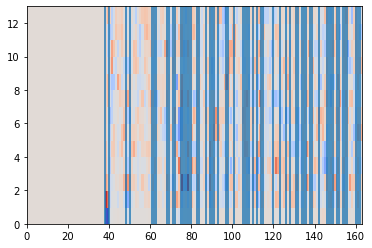

In [12]:
plt.pcolormesh(delta_1.T, cmap=get_cmap("coolwarm"))
current_label = 0
for index, label in enumerate(resuls.labels_):
    if label!= current_label:
        current_label = label
        plt.axvline(index)